Ty Ando DSCI-100 Project Planning Stage Group 009-12

In [22]:
library(tidyverse)
library(repr)
library(tidymodels)

In [23]:
players_data <- read_csv("data/players.csv")
sessions_data <- read_csv("data/sessions.csv")
head(players_data, n = 10)
head(sessions_data, n = 10)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [24]:
num_rows_players <- nrow(players_data)
num_rows_sessions <- nrow(sessions_data)
print("Number of players = ")
num_rows_players
print("Number of sessions = ")
num_rows_sessions
find_mean_players_data <- players_data |>
                select(played_hours, Age) |>
                map_dfr(mean, na.rm  = TRUE)
find_mean_players_data

[1] "Number of players = "


[1] 196

[1] "Number of sessions = "


[1] 1535

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


(1) Data Description:

- Players dataset
  - 7 different variables
    - Experience (character)
      - Beginner, Amateur, Regular, Pro, or Veteran
    - Subscribed
      - True or False
    - Hashed Email (character)
    - Played Hours (double)
    - Name (character)
      - Name of the player
    - Gender (character)
      - Agender, Female, Male, Non-binary, Other, Prefer not to say, or Two-Spirited
    - Age (double)
      - Age of player
  - The players dataset contains 196 entries, each representing a unique player
  - Average age is 21.14 years old
  - Average play time is 5.85 hours
  - Possible data issues
    - Some players have 0 played hours


- Sessions dataset
  - 5 different variables
    - Hashed Email (character)
    - Start Time (character)
      - The time the player started that particular play session
    - End Time (character)
      - The time the player ended that particular play session
    - Original Start Time (double)
      - Unix timestamp
      - a way to track time as a running total of seconds
    - Original End Time (double)
      - Unix timestamp
      - a way to track time as a running total of seconds
  - The sessions dataset contains 1535 entries, each representing a unique session of a player
  - Possible data issues
    - Time fields must be standardized for duration calculations

   
- Connections between datasets could be made through the hashed email to map the sessions of each player in the dataset

(2) Questions:

For this report, I selected Question 1: “What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter?”.
My specific question is:
- Can player experience level, gender, age, and total play time predict whether a player subscribes to the newsletter?

Answering this question helps identify which types of players are most engaged with the research community and can inform recruitment and communication strategies. The players.csv file will be used as it contains demographic and categorical variables such as experience level, gender, and age, as well as a logical variable indicating whether each player subscribed to the newsletter. The players dataset will have one row per player and include all predictor variables (experience, gender, age, play time) and the binary outcome variable (subscribe). This structure is suitable for applying logistic regression, which can estimate how each predictor contributes to the probability of a player subscribing.

In [25]:
find_min_players_data <- players_data |>
                select(played_hours, Age) |>
                map_dfr(min, na.rm  = TRUE)
find_max_players_data <- players_data |>
                select(played_hours, Age) |>
                map_dfr(max, na.rm  = TRUE)
find_min_players_data
find_max_players_data
find_mean_players_data

played_hours,Age
<dbl>,<dbl>
0,9


played_hours,Age
<dbl>,<dbl>
223.1,58


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


In [26]:
find_median_exp <- players_data |>
                group_by(experience) |>
                summarize(count = n())
find_median_exp
find_median_sub <- players_data |>
                group_by(subscribe) |>
                summarize(count = n())
find_median_sub
find_median_gen <- players_data |>
                group_by(gender) |>
                summarize(count = n())
find_median_gen

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


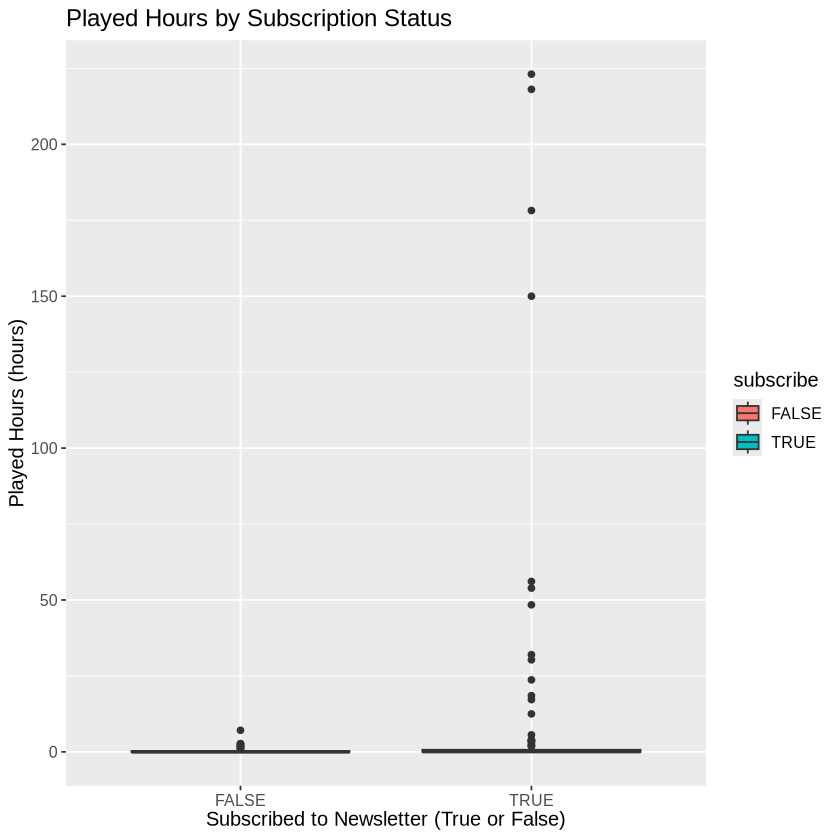

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


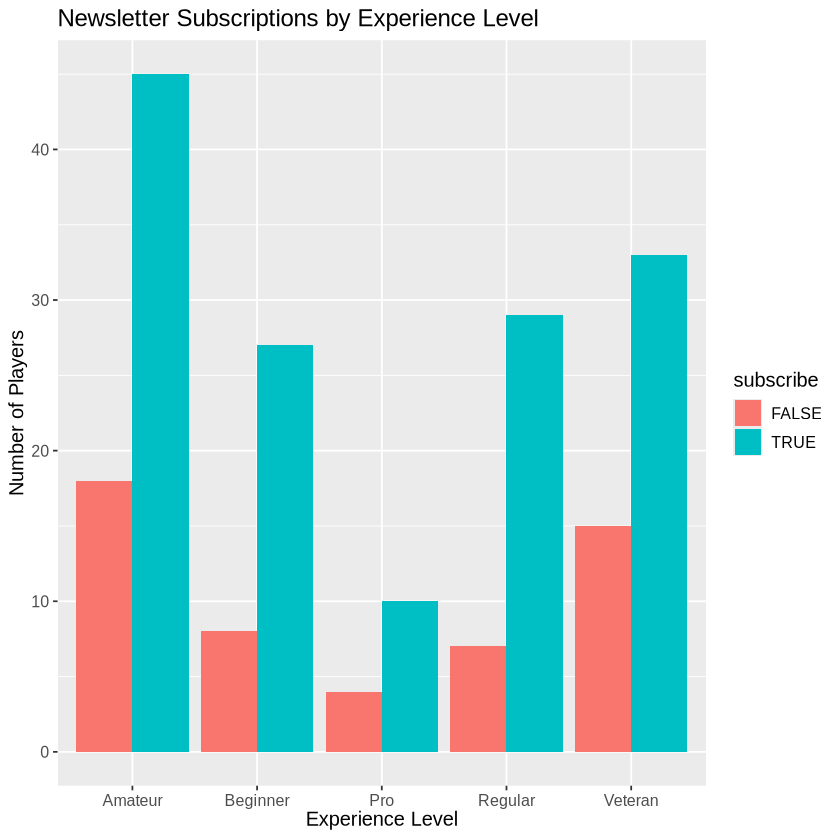

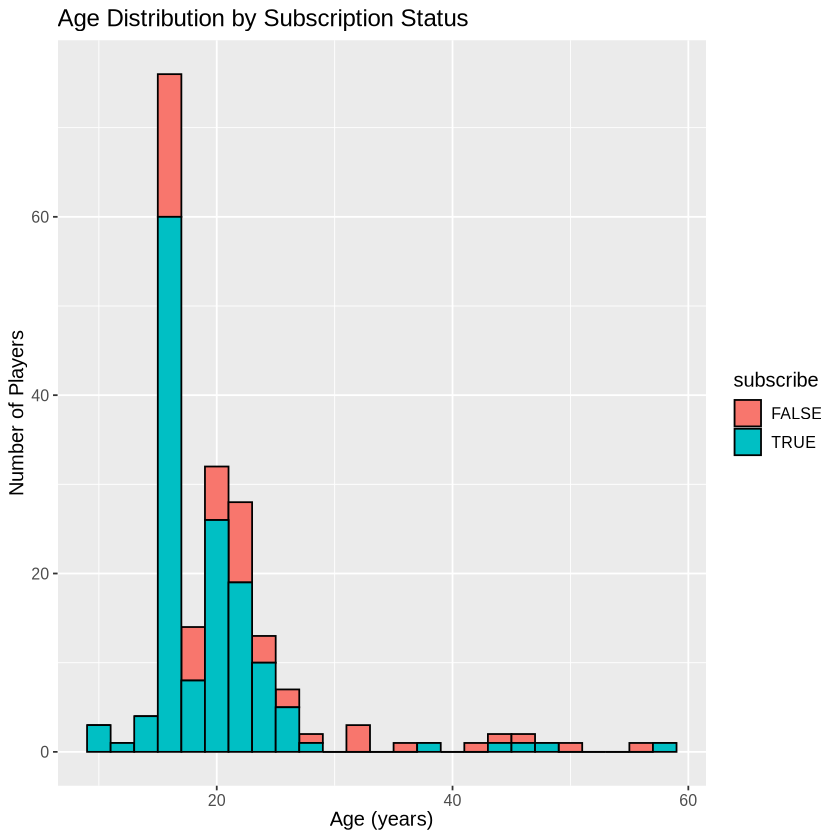

In [27]:

# Distribution of played hours by subscription status
# Box plot used to separate subscribed from not subscribed, while also plotting the played hours on the y axis
players_data |> 
  ggplot(aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot() +
  labs(
    title = "Played Hours by Subscription Status",
    x = "Subscribed to Newsletter (True or False)",
    y = "Played Hours (hours)"
  ) +
  theme(text = element_text(size = 12))

# Experience level vs subscription count
players_data |>
  ggplot(aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Newsletter Subscriptions by Experience Level",
    x = "Experience Level",
    y = "Number of Players"
  ) +
  theme(text = element_text(size = 12))

# Age distribution by subscription
players_data |>
  ggplot(aes(x = Age, fill = subscribe)) +
  geom_histogram(binwidth = 2, colour = "black") +
  labs(
    title = "Age Distribution by Subscription Status",
    x = "Age (years)",
    y = "Number of Players"
  ) +
  theme(text = element_text(size = 12))

(3) Exploratory Data Analysis and Visualization

- Players Dataset
  - Data set is already tidy
    - Each variable forms a column
    - Each observation forms a row
    - Each cell is a singular measurement
  - Contains 196 different users
  - Mean time played
    - 5.84 hours
  - Mean age of users
    - 21.14 years old
  - Lowest values in the data set
    - Hours played is 0 hours
    - Age is 9 years old
  - Max values in the data set
    - Hours Played is 223.1 hours
    - Age is 58 years old
  - Medians of the categorical variables
    - Median experience is Amateur
    - Median gender is male
    - large majority of users are subscribed

- Insight from plots
  - From plots I can see a large majority in all the plots are subscribed
  - It appears that most of the players that play more than ~10 hours are all subscribed
  - Hours played seems to be most influential to if they are subscribed

(4) Methods and Plan

For this analysis, I propose using a classification model to predict newsletter subscription (subscribe) based on the explanatory variables:
experience, played_hours, gender, and Age.

Why is this method appropriate:
The prediction variable (subscribe) is binary, thus we can use a classification model to see if the prediction results in either true or false. 
Using a knn classification model we can predict data based on a model trained by data provided.

Assumptions:
The knn classification model assumes that observations that are “close” in the feature space are likely to have the same outcome. This means that similarity in experience, played hours, age, or gender should be predictive of subscribing.

Potential limitations:
Knn can be sensitive to irrelevant or highly correlated variables, and its performance can degrade with high-dimensional data. Additionally, as seen previously, where we noticed the played hours plot was the most revealing, other predictors may negatively influence the model's ability to predict accurately. 

Model comparison and data splitting:
I will evaluate model performance using metrics such as accuracy, precision, and recall. Data will be split 70/30 into training and testing sets using initial_split(). Different values of k will be tested using cross-validation to identify the optimal number of neighbours. The model with the best balance between accuracy and generalization on unseen data will be selected. A confusion matrix will also be used to examine how well the model predicts both classes (subscribed vs. not subscribed).